In [1]:
from google.colab import drive; drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load datasets
import pandas as pd
city_data = pd.read_csv("/content/city_level_data_0_0.csv", encoding='cp1252')
# Added encoding='latin-1' to handle the different file encoding
city_codebook = pd.read_csv("/content/city_level_codebook_0.csv", encoding='latin-1')

In [ ]:
city_data

,iso3c,region_id,country_name,income_id,city_name,additional_data_annual_budget_for_waste_management_year,additional_data_annual_solid_waste_budget_year,additional_data_annual_swm_budget_2017_year,additional_data_annual_swm_budget_year,additional_data_annual_waste_budget_year,...,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent
0,AFG,SAS,Afghanistan,LIC,Jalalabad,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,Kandahar,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
2,AFG,SAS,Afghanistan,LIC,Mazar-E-Sharif,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
3,AFG,SAS,Afghanistan,LIC,Kabul,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,25.0,NaN
4,AFG,SAS,Afghanistan,LIC,HiratÃ‚Â,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,ZWE,SSF,Zimbabwe,LIC,HarareÃ‚Â,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,ZWE,SSF,Zimbabwe,LIC,Gweru,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,ZWE,SSF,Zimbabwe,LIC,Kariba,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,ZWE,SSF,Zimbabwe,LIC,Masvingo City,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check for missing values
print(city_data.isnull().sum())

iso3c                                                              0
region_id                                                          0
country_name                                                       0
income_id                                                          0
city_name                                                          0
                                                                ... 
waste_treatment_other_percent                                    319
waste_treatment_recycling_percent                                239
waste_treatment_sanitary_landfill_landfill_gas_system_percent    312
waste_treatment_unaccounted_for_percent                          246
waste_treatment_waterways_marine_percent                         363
Length: 113, dtype: int64


In [6]:
city_Newdata = city_data[["iso3c","region_id","country_name","city_name","income_id","population_population_number_of_people","total_msw_total_msw_generated_tons_year","waste_treatment_open_dump_percent","waste_treatment_recycling_percent"]].drop_duplicates()
# This will correctly select the desired columns and create a copy in city_Newdata
city_Newdata

,iso3c,region_id,country_name,city_name,income_id,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent
0,AFG,SAS,Afghanistan,Jalalabad,LIC,326585.0,58914.45,100.0,NaN
1,AFG,SAS,Afghanistan,Kandahar,LIC,429000.0,120971,100.0,NaN
2,AFG,SAS,Afghanistan,Mazar-E-Sharif,LIC,635250.0,52368.4,100.0,NaN
3,AFG,SAS,Afghanistan,Kabul,LIC,3700000.0,1989250,75.0,NaN
4,AFG,SAS,Afghanistan,HiratÃ‚Â,LIC,337000.0,91644.7,100.0,NaN
...,...,...,...,...,...,...,...,...,...
362,ZWE,SSF,Zimbabwe,HarareÃ‚Â,LIC,1379000.0,352334.5,NaN,NaN
363,ZWE,SSF,Zimbabwe,Gweru,LIC,157865.0,37887.6,NaN,NaN
364,ZWE,SSF,Zimbabwe,Kariba,LIC,26512.0,7423.36,NaN,NaN
365,ZWE,SSF,Zimbabwe,Masvingo City,LIC,NaN,NaN,NaN,NaN


In [7]:
# Check for missing values
print(city_Newdata.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 0
city_name                                    0
income_id                                    0
population_population_number_of_people      10
total_msw_total_msw_generated_tons_year     41
waste_treatment_open_dump_percent          266
waste_treatment_recycling_percent          239
dtype: int64


In [8]:
waste_summary = city_Newdata.groupby('region_id')[['waste_treatment_open_dump_percent', 'waste_treatment_recycling_percent']].mean()
print(waste_summary)

           waste_treatment_open_dump_percent  \
region_id                                      
EAS                                78.836667   
ECS                                61.295455   
LCN                                37.074545   
MEA                                59.642857   
NAC                                      NaN   
SAS                                70.828421   
SSF                                70.616667   

           waste_treatment_recycling_percent  
region_id                                     
EAS                                16.733174  
ECS                                22.137103  
LCN                                11.925000  
MEA                                 9.661538  
NAC                                38.090000  
SAS                                10.551818  
SSF                                 8.500000  


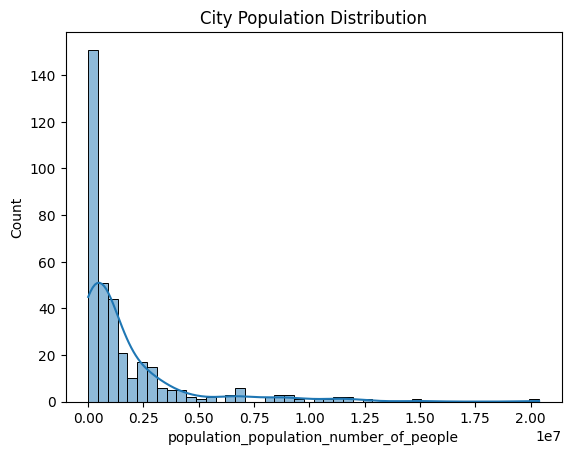

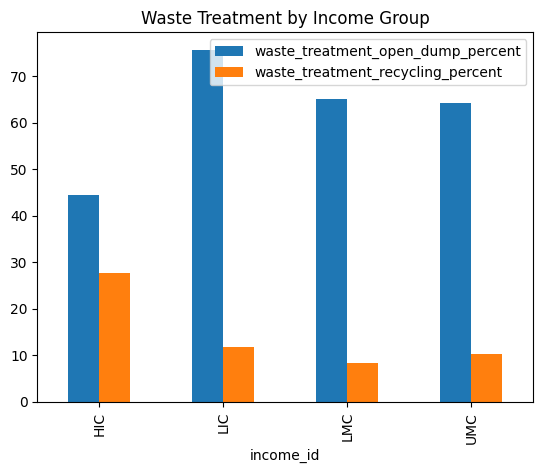

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Population distribution
sns.histplot(city_Newdata['population_population_number_of_people'], kde=True)
plt.title('City Population Distribution')
plt.show()

# Waste treatment percentages by income group
waste_cols = ['waste_treatment_open_dump_percent', 'waste_treatment_recycling_percent']
city_Newdata.groupby('income_id')[waste_cols].mean().plot(kind='bar')
plt.title('Waste Treatment by Income Group')
plt.show()

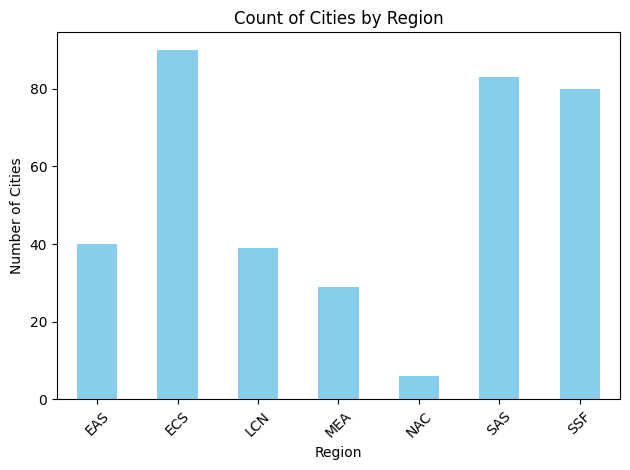

In [10]:
city_counts = city_Newdata.groupby("region_id").size()
import matplotlib.pyplot as plt

city_counts.plot(kind='bar', color='skyblue', title='Count of Cities by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import plotly.express as px

# Example: Regional Waste Treatment Visualization
fig = px.bar(city_Newdata, x='region_id', y='waste_treatment_open_dump_percent', color='income_id')
fig.show()

In [12]:
import plotly.express as px

# Example: Regional Waste Treatment Visualization
fig = px.bar(city_Newdata, x='region_id', y='waste_treatment_recycling_percent', color='income_id')
fig.show()

In [13]:
# Check for missing values
print(city_Newdata.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 0
city_name                                    0
income_id                                    0
population_population_number_of_people      10
total_msw_total_msw_generated_tons_year     41
waste_treatment_open_dump_percent          266
waste_treatment_recycling_percent          239
dtype: int64


In [14]:
city_total_data = city_Newdata.dropna(subset=["total_msw_total_msw_generated_tons_year"], inplace=False)
# Changed the first argument to subset=["total_msw_total_msw_generated_tons_year"]
# This will drop rows where "total_msw_total_msw_generated_tons_year" has missing values
city_total_data

,iso3c,region_id,country_name,city_name,income_id,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent
0,AFG,SAS,Afghanistan,Jalalabad,LIC,326585.0,58914.45,100.0,NaN
1,AFG,SAS,Afghanistan,Kandahar,LIC,429000.0,120971,100.0,NaN
2,AFG,SAS,Afghanistan,Mazar-E-Sharif,LIC,635250.0,52368.4,100.0,NaN
3,AFG,SAS,Afghanistan,Kabul,LIC,3700000.0,1989250,75.0,NaN
4,AFG,SAS,Afghanistan,HiratÃ‚Â,LIC,337000.0,91644.7,100.0,NaN
...,...,...,...,...,...,...,...,...,...
360,ZWE,SSF,Zimbabwe,Norton,LIC,58421.0,14021.04,NaN,NaN
361,ZWE,SSF,Zimbabwe,Chinhoyi,LIC,98000.0,25480,NaN,NaN
362,ZWE,SSF,Zimbabwe,HarareÃ‚Â,LIC,1379000.0,352334.5,NaN,NaN
363,ZWE,SSF,Zimbabwe,Gweru,LIC,157865.0,37887.6,NaN,NaN


In [15]:
city_total_data["total_msw_total_msw_generated_tons_year"] = pd.to_numeric(city_total_data["total_msw_total_msw_generated_tons_year"], errors='coerce')
city_total_data["population_population_number_of_people"] = pd.to_numeric(city_total_data["population_population_number_of_people"], errors='coerce')
city_total_data["msw per capita"] = city_total_data["total_msw_total_msw_generated_tons_year"] / city_total_data["population_population_number_of_people"]
city_total_data

<ipython-input-15-f83d7ad1bad8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-f83d7ad1bad8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-f83d7ad1bad8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso3c,region_id,country_name,city_name,income_id,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,msw per capita
0,AFG,SAS,Afghanistan,Jalalabad,LIC,326585.0,58914.45,100.0,NaN,0.180395
1,AFG,SAS,Afghanistan,Kandahar,LIC,429000.0,120971.00,100.0,NaN,0.281984
2,AFG,SAS,Afghanistan,Mazar-E-Sharif,LIC,635250.0,52368.40,100.0,NaN,0.082437
3,AFG,SAS,Afghanistan,Kabul,LIC,3700000.0,1989250.00,75.0,NaN,0.537635
4,AFG,SAS,Afghanistan,HiratÃ‚Â,LIC,337000.0,91644.70,100.0,NaN,0.271943
...,...,...,...,...,...,...,...,...,...,...
360,ZWE,SSF,Zimbabwe,Norton,LIC,58421.0,14021.04,NaN,NaN,0.240000
361,ZWE,SSF,Zimbabwe,Chinhoyi,LIC,98000.0,25480.00,NaN,NaN,0.260000
362,ZWE,SSF,Zimbabwe,HarareÃ‚Â,LIC,1379000.0,352334.50,NaN,NaN,0.255500
363,ZWE,SSF,Zimbabwe,Gweru,LIC,157865.0,37887.60,NaN,NaN,0.240000


In [16]:
# Check for missing values
print(city_total_data.isnull().sum())


iso3c                                        0
region_id                                    0
country_name                                 0
city_name                                    0
income_id                                    0
population_population_number_of_people       0
total_msw_total_msw_generated_tons_year      1
waste_treatment_open_dump_percent          228
waste_treatment_recycling_percent          202
msw per capita                               1
dtype: int64


In [17]:
city_total_data = city_total_data.dropna(subset=["total_msw_total_msw_generated_tons_year"], inplace=False)
# Changed the first argument to subset=["total_msw_total_msw_generated_tons_year"]
# This will drop rows where "total_msw_total_msw_generated_tons_year" has missing values
city_total_data

,iso3c,region_id,country_name,city_name,income_id,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,msw per capita
0,AFG,SAS,Afghanistan,Jalalabad,LIC,326585.0,58914.45,100.0,NaN,0.180395
1,AFG,SAS,Afghanistan,Kandahar,LIC,429000.0,120971.00,100.0,NaN,0.281984
2,AFG,SAS,Afghanistan,Mazar-E-Sharif,LIC,635250.0,52368.40,100.0,NaN,0.082437
3,AFG,SAS,Afghanistan,Kabul,LIC,3700000.0,1989250.00,75.0,NaN,0.537635
4,AFG,SAS,Afghanistan,HiratÃ‚Â,LIC,337000.0,91644.70,100.0,NaN,0.271943
...,...,...,...,...,...,...,...,...,...,...
360,ZWE,SSF,Zimbabwe,Norton,LIC,58421.0,14021.04,NaN,NaN,0.240000
361,ZWE,SSF,Zimbabwe,Chinhoyi,LIC,98000.0,25480.00,NaN,NaN,0.260000
362,ZWE,SSF,Zimbabwe,HarareÃ‚Â,LIC,1379000.0,352334.50,NaN,NaN,0.255500
363,ZWE,SSF,Zimbabwe,Gweru,LIC,157865.0,37887.60,NaN,NaN,0.240000


In [18]:
# Check for missing values
print(city_total_data.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 0
city_name                                    0
income_id                                    0
population_population_number_of_people       0
total_msw_total_msw_generated_tons_year      0
waste_treatment_open_dump_percent          227
waste_treatment_recycling_percent          201
msw per capita                               0
dtype: int64


In [19]:
city_codebook

,regionID,iso3c,country_name,city_name,incomeID,measurement,units,year,source,comments,Unnamed: 10
0,SAS,AFG,Afghanistan,Jalalabad,LIC,population_population_number_of_people,# of people,2015.0,"Islamic Republic of Afghanistan. 2015. ""State ...",NaN,NaN
1,SAS,IND,India,Vishakhapatnam,LMC,population_population_number_of_people,# of people,2011.0,"Census of India. 2014. ""Databook for PC 2011.""...",NaN,NaN
2,LCN,COL,Colombia,Cali,UMC,population_population_number_of_people,# of people,2005.0,CCAC (Climate and Clean Air Coalition). n.d.(d...,NaN,NaN
3,SAS,AFG,Afghanistan,Kabul,LIC,population_population_number_of_people,# of people,2016.0,"World Bank. 2016b. ""Islamic Â Republic of Afgh...",NaN,NaN
4,SAS,AFG,Afghanistan,Hirat?,LIC,population_population_number_of_people,# of people,2015.0,"UN DESA (United Nations, Department of Economi...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
679,SSF,ZWE,Zimbabwe,Gweru,LIC,total_msw_total_msw_generated_tons_year,tonnes/year,2014.0,GIZ (Deutsche Gesellschaft fÃ¼r Internationale...,1 (0.24 kg/person/day),NaN
680,SSF,ZWE,Zimbabwe,HarareÂ,LIC,total_msw_total_msw_generated_tons_year,tonnes/year,2000.0,"Achankeng, Eric. 2003. ""Globalization, Urbaniz...",1 (0.7 kg/person/day),NaN
681,ECS,RUS,Russian Federation,Kemerovo,UMC,total_msw_total_msw_generated_tons_year,tonnes/year,2016.0,"Evgenievna, Bannikova Anastasia. 2017. ""Develo...",Nature Management and Environmental Engineering,Tomsk STate University. Ministry of Education...
682,SSF,ZWE,Zimbabwe,Chinhoyi,LIC,total_msw_total_msw_generated_tons_year,tonnes/year,2012.0,GIZ (Deutsche Gesellschaft fÃ¼r Internationale...,1 (0.26 kg/person/day),NaN


In [20]:
city_Newcodebook = city_codebook.iloc[:,0:8]
city_Year_codebook = city_Newcodebook.dropna(subset=["year"])
tonnes_data = city_Year_codebook[city_Year_codebook['units'] == 'tonnes/year']
city_Year_codebook['year'] = city_Year_codebook['year'].astype(int)
tonnes_data

<ipython-input-20-b49e1e3c95fc>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,regionID,iso3c,country_name,city_name,incomeID,measurement,units,year
358,ECS,EST,Estonia,Tallinn,HIC,total_msw_total_msw_generated_tons_year,tonnes/year,2012.0
359,LCN,BLZ,Belize,Belize City,UMC,total_msw_total_msw_generated_tons_year,tonnes/year,2015.0
360,SAS,AFG,Afghanistan,Kandahar,LIC,total_msw_total_msw_generated_tons_year,tonnes/year,2017.0
361,SSF,BWA,Botswana,Gaborone,UMC,total_msw_total_msw_generated_tons_year,tonnes/year,2011.0
362,ECS,HRV,Croatia,Zagreb,UMC,total_msw_total_msw_generated_tons_year,tonnes/year,2015.0
...,...,...,...,...,...,...,...,...
679,SSF,ZWE,Zimbabwe,Gweru,LIC,total_msw_total_msw_generated_tons_year,tonnes/year,2014.0
680,SSF,ZWE,Zimbabwe,HarareÂ,LIC,total_msw_total_msw_generated_tons_year,tonnes/year,2000.0
681,ECS,RUS,Russian Federation,Kemerovo,UMC,total_msw_total_msw_generated_tons_year,tonnes/year,2016.0
682,SSF,ZWE,Zimbabwe,Chinhoyi,LIC,total_msw_total_msw_generated_tons_year,tonnes/year,2012.0


In [21]:
import pandas as pd

# Example: Rename columns in `tonnes_data` to match `city_com_data`
tonnes_data.rename(columns={
    "regionID": "region_id",
    "incomeID": "income_id"
}, inplace=True)

# Perform the merge on common columns
merged_data = pd.merge(
    city_total_data,
    tonnes_data[["city_name", "year"]],  # Only keep necessary columns from tonnes_data
    how="left",  # Left join to keep all rows from city_com_data
    on="city_name"  # Merge on city_name
)

# Check the resulting table
merged_data


<ipython-input-21-05d048a36762>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso3c,region_id,country_name,city_name,income_id,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,msw per capita,year
0,AFG,SAS,Afghanistan,Jalalabad,LIC,326585.0,58914.45,100.0,NaN,0.180395,2017.0
1,AFG,SAS,Afghanistan,Kandahar,LIC,429000.0,120971.00,100.0,NaN,0.281984,2017.0
2,AFG,SAS,Afghanistan,Mazar-E-Sharif,LIC,635250.0,52368.40,100.0,NaN,0.082437,2017.0
3,AFG,SAS,Afghanistan,Kabul,LIC,3700000.0,1989250.00,75.0,NaN,0.537635,2016.0
4,AFG,SAS,Afghanistan,HiratÃ‚Â,LIC,337000.0,91644.70,100.0,NaN,0.271943,NaN
...,...,...,...,...,...,...,...,...,...,...,...
320,ZWE,SSF,Zimbabwe,Norton,LIC,58421.0,14021.04,NaN,NaN,0.240000,2012.0
321,ZWE,SSF,Zimbabwe,Chinhoyi,LIC,98000.0,25480.00,NaN,NaN,0.260000,2012.0
322,ZWE,SSF,Zimbabwe,HarareÃ‚Â,LIC,1379000.0,352334.50,NaN,NaN,0.255500,NaN
323,ZWE,SSF,Zimbabwe,Gweru,LIC,157865.0,37887.60,NaN,NaN,0.240000,2014.0


In [22]:
# Check for missing values
print(merged_data.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 0
city_name                                    0
income_id                                    0
population_population_number_of_people       0
total_msw_total_msw_generated_tons_year      0
waste_treatment_open_dump_percent          227
waste_treatment_recycling_percent          201
msw per capita                               0
year                                        22
dtype: int64


In [23]:
# Drop rows with missing 'year'
city_com = merged_data.dropna(subset=["year","total_msw_total_msw_generated_tons_year"],inplace=False)

# Check the size of the resulting DataFrame
print(f"Original data size: {merged_data.shape}")
print(f"Filtered data size: {city_com.shape}")

# Verify if all 'year' values are now valid
print(city_com["year"].isnull().sum())  # Should print 0

Original data size: (325, 11)
Filtered data size: (303, 11)
0


In [24]:
# Check for missing values
print(city_com.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 0
city_name                                    0
income_id                                    0
population_population_number_of_people       0
total_msw_total_msw_generated_tons_year      0
waste_treatment_open_dump_percent          211
waste_treatment_recycling_percent          189
msw per capita                               0
year                                         0
dtype: int64


In [25]:
# Drop rows where "year" is NaN
city_com_codebook = city_com.dropna(subset=["year"])

# Convert the "year" column to integers
city_com_codebook['year'] = city_com_codebook['year'].astype(int)
city_com_codebook

,iso3c,region_id,country_name,city_name,income_id,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,msw per capita,year
0,AFG,SAS,Afghanistan,Jalalabad,LIC,326585.0,58914.45,100.0,NaN,0.180395,2017
1,AFG,SAS,Afghanistan,Kandahar,LIC,429000.0,120971.00,100.0,NaN,0.281984,2017
2,AFG,SAS,Afghanistan,Mazar-E-Sharif,LIC,635250.0,52368.40,100.0,NaN,0.082437,2017
3,AFG,SAS,Afghanistan,Kabul,LIC,3700000.0,1989250.00,75.0,NaN,0.537635,2016
5,AGO,SSF,Angola,Luanda,LMC,4508000.0,1316336.00,NaN,NaN,0.292000,2009
...,...,...,...,...,...,...,...,...,...,...,...
319,ZMB,SSF,Zambia,Lusaka,LMC,1719000.0,530000.00,NaN,6.0,0.308319,2011
320,ZWE,SSF,Zimbabwe,Norton,LIC,58421.0,14021.04,NaN,NaN,0.240000,2012
321,ZWE,SSF,Zimbabwe,Chinhoyi,LIC,98000.0,25480.00,NaN,NaN,0.260000,2012
323,ZWE,SSF,Zimbabwe,Gweru,LIC,157865.0,37887.60,NaN,NaN,0.240000,2014


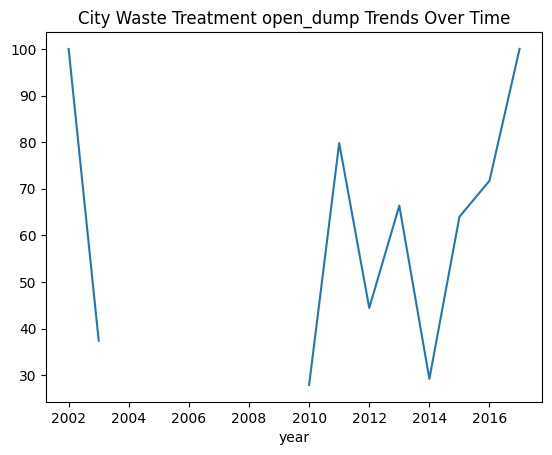

In [26]:
# Trend analysis for a specific metric
yearly_trend = city_com_codebook.groupby('year')['waste_treatment_open_dump_percent'].mean()
yearly_trend.plot()
plt.title('City Waste Treatment open_dump Trends Over Time')
plt.show()


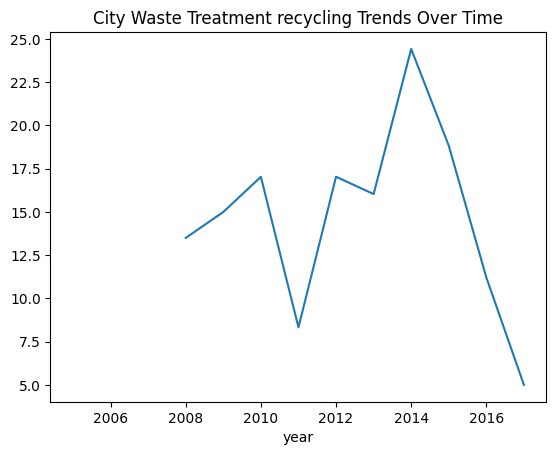

In [27]:
# Trend analysis for a specific metric
yearly_trend = city_com_codebook.groupby('year')['waste_treatment_recycling_percent'].mean()
yearly_trend.plot()
plt.title('City Waste Treatment recycling Trends Over Time')
plt.show()

In [28]:
# Load datasets
country_data = pd.read_csv("/content/country_level_data.csv", encoding='cp1252')
# Added encoding='latin-1' to handle the different file encoding
country_codebook = pd.read_csv("/content/country_level_codebook.csv", encoding='latin-1')

In [29]:
# Check for missing values
print(country_data.isnull().sum())

iso3c                                                                                      0
region_id                                                                                  0
country_name                                                                               1
income_id                                                                                  0
gdp                                                                                        1
composition_food_organic_waste_percent                                                    41
composition_glass_percent                                                                 46
composition_metal_percent                                                                 46
composition_other_percent                                                                 42
composition_paper_cardboard_percent                                                       41
composition_plastic_percent                                           

In [30]:
# Drop rows with missing 'year'
country_Newdata = country_data[["iso3c","region_id","country_name","income_id","gdp","population_population_number_of_people","total_msw_total_msw_generated_tons_year","waste_treatment_open_dump_percent","waste_treatment_recycling_percent"]].drop_duplicates()

country_Newdata

,iso3c,region_id,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent
0,ABW,LCN,Aruba,HIC,35563.312500,103187,8.813202e+04,NaN,11.0
1,AFG,SAS,Afghanistan,LIC,2057.062256,34656032,5.628525e+06,NaN,NaN
2,AGO,SSF,Angola,LMC,8036.690430,25096150,4.213644e+06,NaN,NaN
3,ALB,ECS,Albania,UMC,13724.058590,2854191,1.087447e+06,NaN,NaN
4,AND,ECS,Andorra,HIC,43711.800780,82431,4.300000e+04,NaN,NaN
...,...,...,...,...,...,...,...,...,...
212,XKX,ECS,Kosovo,LMC,9723.561523,1801800,3.190000e+05,33.57,NaN
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,27584212,4.836820e+06,25.00,8.0
214,ZAF,SSF,South Africa,UMC,12666.607420,51729344,1.845723e+07,NaN,28.0
215,ZMB,SSF,Zambia,LMC,3201.289307,14264756,2.608268e+06,NaN,NaN


In [31]:
# Check for missing values
print(country_Newdata.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 1
income_id                                    0
gdp                                          1
population_population_number_of_people       0
total_msw_total_msw_generated_tons_year      2
waste_treatment_open_dump_percent          149
waste_treatment_recycling_percent           92
dtype: int64


In [34]:
country_total_data = country_Newdata.dropna(subset=["total_msw_total_msw_generated_tons_year", "country_name"],inplace=False)
# Changed the first argument to subset=["total_msw_total_msw_generated_tons_year"]
# This will drop rows where "total_msw_total_msw_generated_tons_year" has missing values
country_total_data
country_total_data

,iso3c,region_id,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent
0,ABW,LCN,Aruba,HIC,35563.312500,103187,8.813202e+04,NaN,11.0
1,AFG,SAS,Afghanistan,LIC,2057.062256,34656032,5.628525e+06,NaN,NaN
2,AGO,SSF,Angola,LMC,8036.690430,25096150,4.213644e+06,NaN,NaN
3,ALB,ECS,Albania,UMC,13724.058590,2854191,1.087447e+06,NaN,NaN
4,AND,ECS,Andorra,HIC,43711.800780,82431,4.300000e+04,NaN,NaN
...,...,...,...,...,...,...,...,...,...
212,XKX,ECS,Kosovo,LMC,9723.561523,1801800,3.190000e+05,33.57,NaN
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,27584212,4.836820e+06,25.00,8.0
214,ZAF,SSF,South Africa,UMC,12666.607420,51729344,1.845723e+07,NaN,28.0
215,ZMB,SSF,Zambia,LMC,3201.289307,14264756,2.608268e+06,NaN,NaN


In [35]:
print(country_total_data.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 0
income_id                                    0
gdp                                          0
population_population_number_of_people       0
total_msw_total_msw_generated_tons_year      0
waste_treatment_open_dump_percent          146
waste_treatment_recycling_percent           89
dtype: int64


In [36]:
waste_summary = country_total_data.groupby('region_id')[['waste_treatment_open_dump_percent', 'waste_treatment_recycling_percent']].mean()
print(waste_summary)

           waste_treatment_open_dump_percent  \
region_id                                      
EAS                                35.858571   
ECS                                66.782308   
LCN                                36.425960   
MEA                                56.692308   
NAC                                      NaN   
SAS                                70.666667   
SSF                                72.063636   

           waste_treatment_recycling_percent  
region_id                                     
EAS                                25.890476  
ECS                                24.152759  
LCN                                 7.970556  
MEA                                 9.847059  
NAC                                19.063333  
SAS                                 6.662500  
SSF                                 9.117647  


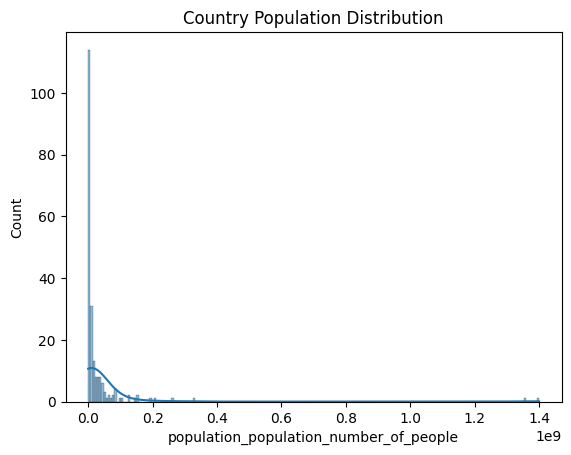

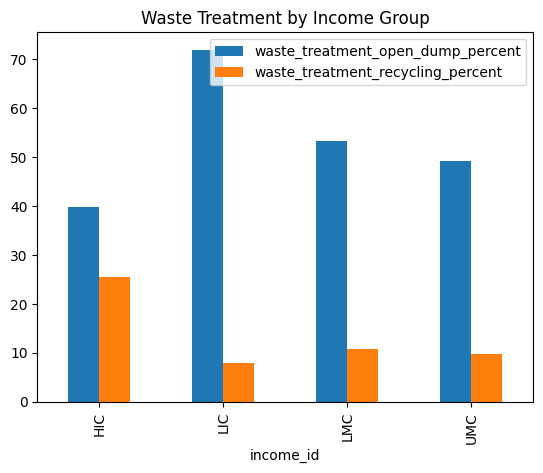

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load datasets
import pandas as pd
# Population distribution
sns.histplot(country_total_data['population_population_number_of_people'], kde=True)
plt.title('Country Population Distribution')
plt.show()

# Waste treatment percentages by income group
waste_cols = ['waste_treatment_open_dump_percent', 'waste_treatment_recycling_percent']
country_total_data.groupby('income_id')[waste_cols].mean().plot(kind='bar')
plt.title('Waste Treatment by Income Group')
plt.show()

In [38]:
import plotly.express as px

# Example: Regional Waste Treatment Visualization
fig = px.bar(country_total_data, x='region_id', y='waste_treatment_open_dump_percent', color='income_id')
fig.show()

In [39]:
import plotly.express as px

# Example: Regional Waste Treatment Visualization
fig = px.bar(country_total_data, x='region_id', y='waste_treatment_recycling_percent', color='income_id')
fig.show()

<ipython-input-40-3ce976c99552>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



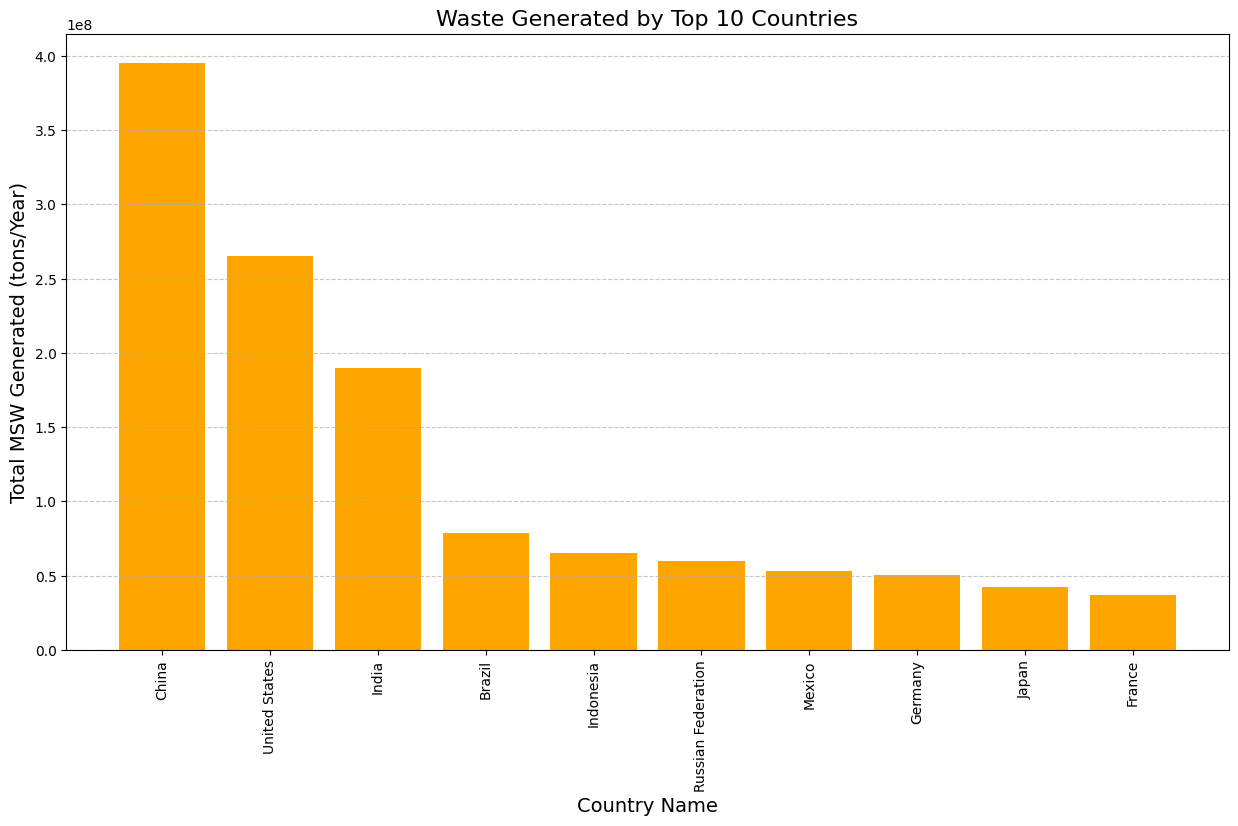

In [40]:
# Convert the 'total_msw_total_msw_generated_tons_year' column to numeric type before using nlargest
country_total_data["total_msw_total_msw_generated_tons_year"] = pd.to_numeric(country_total_data["total_msw_total_msw_generated_tons_year"], errors='coerce')

# Filter the top 10 cities based on total waste generated
top_countries = country_total_data.nlargest(10, "total_msw_total_msw_generated_tons_year")

# Dynamically adjust the figure size based on the number of cities
plt.figure(figsize=(max(15, len(top_countries) / 2), 8))  # Adjust width dynamically

# Plot the bar chart
plt.bar(top_countries["country_name"], top_countries["total_msw_total_msw_generated_tons_year"], color='orange')

# Customize the plot
plt.xticks(rotation=90, fontsize=10)  # Rotate X-axis labels for better readability
plt.xlabel("Country Name", fontsize=14)
plt.ylabel("Total MSW Generated (tons/Year)", fontsize=14)
plt.title("Waste Generated by Top 10 Countries", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

<ipython-input-41-48b94c520a95>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



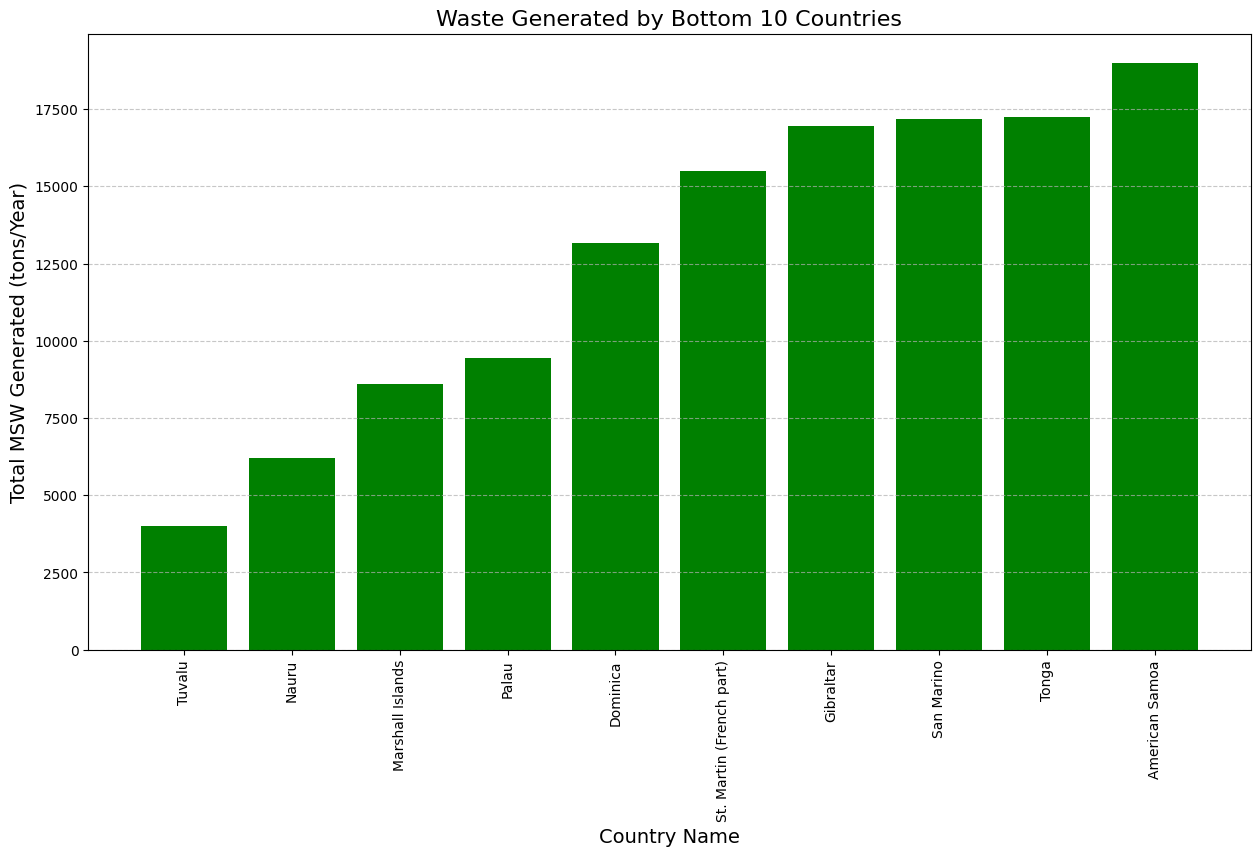

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'total_msw_total_msw_generated_tons_year' column to numeric type before using nsmallest
country_total_data["total_msw_total_msw_generated_tons_year"] = pd.to_numeric(
    country_total_data["total_msw_total_msw_generated_tons_year"], errors="coerce"
)

# Filter the bottom 10 countries based on total waste generated
bottom_countries = country_total_data.nsmallest(10, "total_msw_total_msw_generated_tons_year")

# Dynamically adjust the figure size based on the number of countries
plt.figure(figsize=(max(15, len(bottom_countries) / 2), 8))  # Adjust width dynamically

# Plot the bar chart
plt.bar(bottom_countries["country_name"], bottom_countries["total_msw_total_msw_generated_tons_year"], color="green")

# Customize the plot
plt.xticks(rotation=90, fontsize=10)  # Rotate X-axis labels for better readability
plt.xlabel("Country Name", fontsize=14)
plt.ylabel("Total MSW Generated (tons/Year)", fontsize=14)
plt.title("Waste Generated by Bottom 10 Countries", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()


In [42]:
country_total_data["gdp per capita"] = country_total_data["gdp"] / country_total_data["population_population_number_of_people"]
country_total_data["msw per capita"] = country_total_data["total_msw_total_msw_generated_tons_year"] / country_total_data["population_population_number_of_people"]
country_total_data

<ipython-input-42-7f5ad757eff3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-7f5ad757eff3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso3c,region_id,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,gdp per capita,msw per capita
0,ABW,LCN,Aruba,HIC,35563.312500,103187,8.813202e+04,NaN,11.0,0.344649,0.854100
1,AFG,SAS,Afghanistan,LIC,2057.062256,34656032,5.628525e+06,NaN,NaN,0.000059,0.162411
2,AGO,SSF,Angola,LMC,8036.690430,25096150,4.213644e+06,NaN,NaN,0.000320,0.167900
3,ALB,ECS,Albania,UMC,13724.058590,2854191,1.087447e+06,NaN,NaN,0.004808,0.381000
4,AND,ECS,Andorra,HIC,43711.800780,82431,4.300000e+04,NaN,NaN,0.530284,0.521648
...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,ECS,Kosovo,LMC,9723.561523,1801800,3.190000e+05,33.57,NaN,0.005397,0.177045
213,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,27584212,4.836820e+06,25.00,8.0,0.000300,0.175347
214,ZAF,SSF,South Africa,UMC,12666.607420,51729344,1.845723e+07,NaN,28.0,0.000245,0.356804
215,ZMB,SSF,Zambia,LMC,3201.289307,14264756,2.608268e+06,NaN,NaN,0.000224,0.182847


Average Metrics by Income Group:
            msw per capita  gdp per capita
income_id                                
HIC              0.618548        0.242126
LIC              0.162935        0.000356
LMC              0.216491        0.003368
UMC              0.304646        0.041132


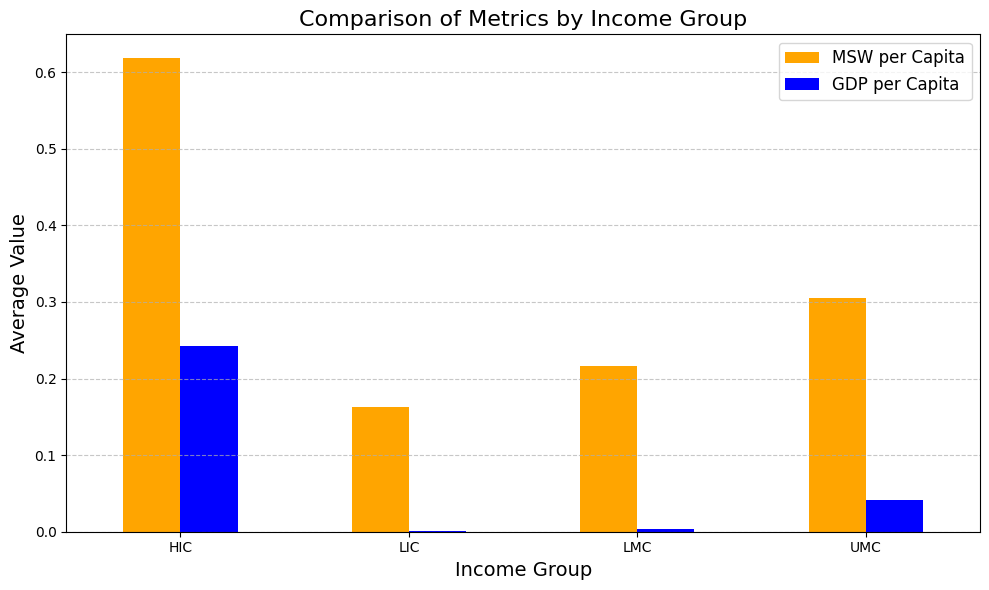

In [43]:
# Group data by income group and compute average metrics
grouped_metrics = country_total_data.groupby("income_id")[["msw per capita", "gdp per capita"]].mean() # Use column names with spaces

# Display the result
print("Average Metrics by Income Group:\n", grouped_metrics)

# Visualization: Bar chart for comparison
grouped_metrics.plot(kind="bar", figsize=(10, 6), color=["orange", "blue"])
plt.title("Comparison of Metrics by Income Group", fontsize=16)
plt.xlabel("Income Group", fontsize=14)
plt.ylabel("Average Value", fontsize=14)
plt.xticks(rotation=0)
plt.legend(["MSW per Capita", "GDP per Capita"], fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-44-3156580eb21c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




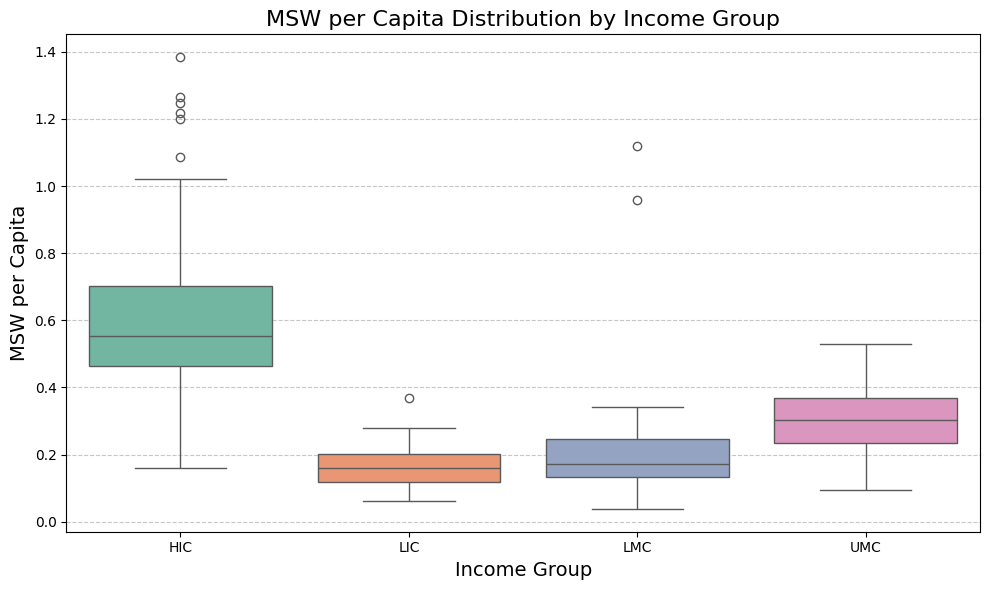

In [44]:
# Boxplot for distribution comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=country_total_data, x="income_id", y="msw per capita", palette="Set2") # Changed y to "msw per capita"
plt.title("MSW per Capita Distribution by Income Group", fontsize=16)
plt.xlabel("Income Group", fontsize=14)
plt.ylabel("MSW per Capita", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
print(country_total_data.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 0
income_id                                    0
gdp                                          0
population_population_number_of_people       0
total_msw_total_msw_generated_tons_year      0
waste_treatment_open_dump_percent          146
waste_treatment_recycling_percent           89
gdp per capita                               0
msw per capita                               0
dtype: int64


In [46]:
country_codebook

,regionID,iso3c,country_name,incomeID,measurement,units,year,source,comments,Unnamed: 9
0,EAS,ASM,American Samoa,UMC,composition_food_organic_waste_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN,NaN
1,EAS,ASM,American Samoa,UMC,composition_glass_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN,NaN
2,EAS,ASM,American Samoa,UMC,composition_metal_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN,NaN
3,EAS,ASM,American Samoa,UMC,composition_other_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,7; 8; 9; other includes disposable diaper (5.5...,NaN
4,EAS,ASM,American Samoa,UMC,composition_paper_cardboard_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3771,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_pop...,Percent of households,2013.0,"Muchandiona, Aleck. 2013. ""Challenges and Oppo...",NaN,NaN
3772,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_waste,Percent of households,2013.0,"Muchandiona, Aleck. 2013. ""Challenges and Oppo...",NaN,NaN
3773,SSF,ZWE,Zimbabwe,LIC,waste_treatment_other_percent,%,2015.0,"Mohee, R., and M. A. Z. Bundhoo. 2015. ""A Comp...",1,NaN
3774,SSF,ZWE,Zimbabwe,LIC,waste_treatment_recycling_percent,tonnes/year,2005.0,AFED (Arab Forum for Environment and Developme...,NaN,NaN


In [ ]:
print(country_codebook.isnull().sum())

regionID           0
iso3c              0
country_name      17
incomeID           0
measurement        0
units              0
year              72
source            74
comments        3178
Unnamed: 9      3774
dtype: int64


In [47]:
country_Newcodebook = country_codebook.dropna(subset=["country_name","year"], inplace=False)
# Changed the first argument to subset=["total_msw_total_msw_generated_tons_year"]
# This will drop rows where "total_msw_total_msw_generated_tons_year" has missing values
country_Newcodebook


,regionID,iso3c,country_name,incomeID,measurement,units,year,source,comments,Unnamed: 9
0,EAS,ASM,American Samoa,UMC,composition_food_organic_waste_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN,NaN
1,EAS,ASM,American Samoa,UMC,composition_glass_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN,NaN
2,EAS,ASM,American Samoa,UMC,composition_metal_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN,NaN
3,EAS,ASM,American Samoa,UMC,composition_other_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,7; 8; 9; other includes disposable diaper (5.5...,NaN
4,EAS,ASM,American Samoa,UMC,composition_paper_cardboard_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3770,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_hou...,Percent of households,2013.0,"Muchandiona, Aleck. 2013. ""Challenges and Oppo...",NaN,NaN
3771,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_pop...,Percent of households,2013.0,"Muchandiona, Aleck. 2013. ""Challenges and Oppo...",NaN,NaN
3772,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_waste,Percent of households,2013.0,"Muchandiona, Aleck. 2013. ""Challenges and Oppo...",NaN,NaN
3773,SSF,ZWE,Zimbabwe,LIC,waste_treatment_other_percent,%,2015.0,"Mohee, R., and M. A. Z. Bundhoo. 2015. ""A Comp...",1,NaN


In [48]:
country_finalcodebook = country_Newcodebook.iloc[:,0:7]
country_finalcodebook

,regionID,iso3c,country_name,incomeID,measurement,units,year
0,EAS,ASM,American Samoa,UMC,composition_food_organic_waste_percent,%,2011.0
1,EAS,ASM,American Samoa,UMC,composition_glass_percent,%,2011.0
2,EAS,ASM,American Samoa,UMC,composition_metal_percent,%,2011.0
3,EAS,ASM,American Samoa,UMC,composition_other_percent,%,2011.0
4,EAS,ASM,American Samoa,UMC,composition_paper_cardboard_percent,%,2011.0
...,...,...,...,...,...,...,...
3770,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_hou...,Percent of households,2013.0
3771,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_pop...,Percent of households,2013.0
3772,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_waste,Percent of households,2013.0
3773,SSF,ZWE,Zimbabwe,LIC,waste_treatment_other_percent,%,2015.0


In [49]:
# Drop rows with missing 'year' and "country_name"
country_Year_codebook = country_finalcodebook.dropna(subset=["year","country_name"],inplace=False)
country_Year_codebook

,regionID,iso3c,country_name,incomeID,measurement,units,year
0,EAS,ASM,American Samoa,UMC,composition_food_organic_waste_percent,%,2011.0
1,EAS,ASM,American Samoa,UMC,composition_glass_percent,%,2011.0
2,EAS,ASM,American Samoa,UMC,composition_metal_percent,%,2011.0
3,EAS,ASM,American Samoa,UMC,composition_other_percent,%,2011.0
4,EAS,ASM,American Samoa,UMC,composition_paper_cardboard_percent,%,2011.0
...,...,...,...,...,...,...,...
3770,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_hou...,Percent of households,2013.0
3771,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_pop...,Percent of households,2013.0
3772,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_waste,Percent of households,2013.0
3773,SSF,ZWE,Zimbabwe,LIC,waste_treatment_other_percent,%,2015.0


In [50]:
print(country_Year_codebook.isnull().sum())

regionID        0
iso3c           0
country_name    0
incomeID        0
measurement     0
units           0
year            0
dtype: int64


In [51]:
# Convert the "year" column to integers
country_Year_codebook['year'] = country_Year_codebook['year'].astype(int)

country_Year_codebook

,regionID,iso3c,country_name,incomeID,measurement,units,year
0,EAS,ASM,American Samoa,UMC,composition_food_organic_waste_percent,%,2011
1,EAS,ASM,American Samoa,UMC,composition_glass_percent,%,2011
2,EAS,ASM,American Samoa,UMC,composition_metal_percent,%,2011
3,EAS,ASM,American Samoa,UMC,composition_other_percent,%,2011
4,EAS,ASM,American Samoa,UMC,composition_paper_cardboard_percent,%,2011
...,...,...,...,...,...,...,...
3770,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_hou...,Percent of households,2013
3771,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_pop...,Percent of households,2013
3772,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_waste,Percent of households,2013
3773,SSF,ZWE,Zimbabwe,LIC,waste_treatment_other_percent,%,2015


In [52]:
# Filter rows based on the "units" column
tonnes_data1 = country_Year_codebook[country_Year_codebook['measurement'] == 'total_msw_total_msw_generated_tons_year']
tonnes_data1

,regionID,iso3c,country_name,incomeID,measurement,units,year
7,EAS,ASM,American Samoa,UMC,total_msw_total_msw_generated_tons_year,tonnes/year,2016
27,EAS,AUS,Australia,HIC,total_msw_total_msw_generated_tons_year,tonnes/year,2015
43,EAS,BRN,Brunei Darussalam,HIC,total_msw_total_msw_generated_tons_year,tonnes/year,2016
61,EAS,CHN,China,UMC,total_msw_total_msw_generated_tons_year,tonnes/year,2019
85,EAS,FJI,Fiji,UMC,total_msw_total_msw_generated_tons_year,tonnes/year,2011
...,...,...,...,...,...,...,...
3709,SSF,TZA,Tanzania,LIC,total_msw_total_msw_generated_tons_year,tonnes/year,2012
3720,SSF,UGA,Uganda,LIC,total_msw_total_msw_generated_tons_year,tonnes/year,2011
3737,SSF,ZAF,South Africa,UMC,total_msw_total_msw_generated_tons_year,tonnes/year,2011
3751,SSF,ZMB,Zambia,LMC,total_msw_total_msw_generated_tons_year,tonnes/year,2011


In [53]:
print(tonnes_data1.isnull().sum())

regionID        0
iso3c           0
country_name    0
incomeID        0
measurement     0
units           0
year            0
dtype: int64


In [54]:
import pandas as pd

# Perform the merge on common columns
country_com_codebook = pd.merge(
    country_total_data,
    tonnes_data1[["country_name", "year"]],  # Only keep necessary columns from tonnes_data
    how="left",  # Left join to keep all rows from city_com_data
    on="country_name"  # Merge on city_name
)

# Check the resulting table
country_com_codebook

,iso3c,region_id,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,gdp per capita,msw per capita,year
0,ABW,LCN,Aruba,HIC,35563.312500,103187,8.813202e+04,NaN,11.0,0.344649,0.854100,2013.0
1,AFG,SAS,Afghanistan,LIC,2057.062256,34656032,5.628525e+06,NaN,NaN,0.000059,0.162411,2016.0
2,AGO,SSF,Angola,LMC,8036.690430,25096150,4.213644e+06,NaN,NaN,0.000320,0.167900,2012.0
3,ALB,ECS,Albania,UMC,13724.058590,2854191,1.087447e+06,NaN,NaN,0.004808,0.381000,2019.0
4,AND,ECS,Andorra,HIC,43711.800780,82431,4.300000e+04,NaN,NaN,0.530284,0.521648,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,ECS,Kosovo,LMC,9723.561523,1801800,3.190000e+05,33.57,NaN,0.005397,0.177045,2015.0
210,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,27584212,4.836820e+06,25.00,8.0,0.000300,0.175347,2016.0
211,ZAF,SSF,South Africa,UMC,12666.607420,51729344,1.845723e+07,NaN,28.0,0.000245,0.356804,2011.0
212,ZMB,SSF,Zambia,LMC,3201.289307,14264756,2.608268e+06,NaN,NaN,0.000224,0.182847,2011.0


In [55]:
# Check for missing values
print(country_com_codebook.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 0
income_id                                    0
gdp                                          0
population_population_number_of_people       0
total_msw_total_msw_generated_tons_year      0
waste_treatment_open_dump_percent          146
waste_treatment_recycling_percent           89
gdp per capita                               0
msw per capita                               0
year                                         1
dtype: int64


In [56]:
# Drop rows where "year" is NaN
country_com_codebook = country_com_codebook.dropna(subset=["year"])

# Convert the "year" column to integers
country_com_codebook['year'] = country_com_codebook['year'].astype(int)

country_com_codebook

<ipython-input-56-c6442edd4001>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso3c,region_id,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,gdp per capita,msw per capita,year
0,ABW,LCN,Aruba,HIC,35563.312500,103187,8.813202e+04,NaN,11.0,0.344649,0.854100,2013
1,AFG,SAS,Afghanistan,LIC,2057.062256,34656032,5.628525e+06,NaN,NaN,0.000059,0.162411,2016
2,AGO,SSF,Angola,LMC,8036.690430,25096150,4.213644e+06,NaN,NaN,0.000320,0.167900,2012
3,ALB,ECS,Albania,UMC,13724.058590,2854191,1.087447e+06,NaN,NaN,0.004808,0.381000,2019
4,AND,ECS,Andorra,HIC,43711.800780,82431,4.300000e+04,NaN,NaN,0.530284,0.521648,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,ECS,Kosovo,LMC,9723.561523,1801800,3.190000e+05,33.57,NaN,0.005397,0.177045,2015
210,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,27584212,4.836820e+06,25.00,8.0,0.000300,0.175347,2016
211,ZAF,SSF,South Africa,UMC,12666.607420,51729344,1.845723e+07,NaN,28.0,0.000245,0.356804,2011
212,ZMB,SSF,Zambia,LMC,3201.289307,14264756,2.608268e+06,NaN,NaN,0.000224,0.182847,2011


In [57]:
# Check for missing values
print(country_com_codebook.isnull().sum())

iso3c                                        0
region_id                                    0
country_name                                 0
income_id                                    0
gdp                                          0
population_population_number_of_people       0
total_msw_total_msw_generated_tons_year      0
waste_treatment_open_dump_percent          145
waste_treatment_recycling_percent           89
gdp per capita                               0
msw per capita                               0
year                                         0
dtype: int64


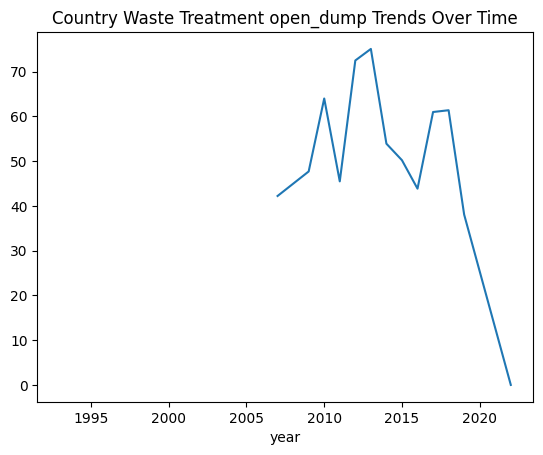

In [58]:
# Trend analysis for a specific metric
yearly_trend = country_com_codebook.groupby('year')['waste_treatment_open_dump_percent'].mean()
yearly_trend.plot()
plt.title('Country Waste Treatment open_dump Trends Over Time')
plt.show()

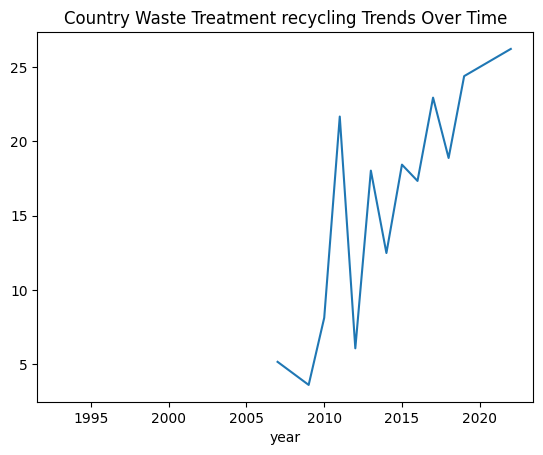

In [59]:
# Trend analysis for a specific metric
yearly_trend = country_com_codebook.groupby('year')['waste_treatment_recycling_percent'].mean()
yearly_trend.plot()
plt.title('Country Waste Treatment recycling Trends Over Time')
plt.show()

In [ ]:
# Save the file to Google Drive
#merged_total_data.to_csv('/content/drive/My Drive/merged_total_data.csv',encoding='cp1252',index=False)

In [60]:
city_com_codebook.head()

,iso3c,region_id,country_name,city_name,income_id,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,msw per capita,year
0,AFG,SAS,Afghanistan,Jalalabad,LIC,326585.0,58914.45,100.0,NaN,0.180395,2017
1,AFG,SAS,Afghanistan,Kandahar,LIC,429000.0,120971.00,100.0,NaN,0.281984,2017
2,AFG,SAS,Afghanistan,Mazar-E-Sharif,LIC,635250.0,52368.40,100.0,NaN,0.082437,2017
3,AFG,SAS,Afghanistan,Kabul,LIC,3700000.0,1989250.00,75.0,NaN,0.537635,2016
5,AGO,SSF,Angola,Luanda,LMC,4508000.0,1316336.00,NaN,NaN,0.292000,2009


In [61]:
city_com_codebook1 = city_com_codebook.iloc[:,[2,3,9]]
city_com_codebook1

,country_name,city_name,msw per capita
0,Afghanistan,Jalalabad,0.180395
1,Afghanistan,Kandahar,0.281984
2,Afghanistan,Mazar-E-Sharif,0.082437
3,Afghanistan,Kabul,0.537635
5,Angola,Luanda,0.292000
...,...,...,...
319,Zambia,Lusaka,0.308319
320,Zimbabwe,Norton,0.240000
321,Zimbabwe,Chinhoyi,0.260000
323,Zimbabwe,Gweru,0.240000


In [62]:
country_com_codebook.head()

,iso3c,region_id,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,waste_treatment_open_dump_percent,waste_treatment_recycling_percent,gdp per capita,msw per capita,year
0,ABW,LCN,Aruba,HIC,35563.312500,103187,8.813202e+04,NaN,11.0,0.344649,0.854100,2013
1,AFG,SAS,Afghanistan,LIC,2057.062256,34656032,5.628525e+06,NaN,NaN,0.000059,0.162411,2016
2,AGO,SSF,Angola,LMC,8036.690430,25096150,4.213644e+06,NaN,NaN,0.000320,0.167900,2012
3,ALB,ECS,Albania,UMC,13724.058590,2854191,1.087447e+06,NaN,NaN,0.004808,0.381000,2019
4,AND,ECS,Andorra,HIC,43711.800780,82431,4.300000e+04,NaN,NaN,0.530284,0.521648,2012


In [63]:
country_com_codebook1 = country_com_codebook.iloc[:,[2,9]]
country_com_codebook1

,country_name,gdp per capita
0,Aruba,0.344649
1,Afghanistan,0.000059
2,Angola,0.000320
3,Albania,0.004808
4,Andorra,0.530284
...,...,...
209,Kosovo,0.005397
210,"Yemen, Rep.",0.000300
211,South Africa,0.000245
212,Zambia,0.000224


In [64]:
import pandas as pd

# Ensure the 'country_name' column exists in both tables
# Merge the tables on the 'country_name' column
merged_table = pd.merge(city_com_codebook1, country_com_codebook1, on="country_name", how="inner")

# Display the result
merged_table




,country_name,city_name,msw per capita,gdp per capita
0,Afghanistan,Jalalabad,0.180395,0.000059
1,Afghanistan,Kandahar,0.281984,0.000059
2,Afghanistan,Mazar-E-Sharif,0.082437,0.000059
3,Afghanistan,Kabul,0.537635,0.000059
4,Angola,Luanda,0.292000,0.000320
...,...,...,...,...
297,Zambia,Lusaka,0.308319,0.000224
298,Zimbabwe,Norton,0.240000,0.000255
299,Zimbabwe,Chinhoyi,0.260000,0.000255
300,Zimbabwe,Gweru,0.240000,0.000255


In [65]:
# Check for missing values
print(merged_table.isnull().sum())

country_name      0
city_name         0
msw per capita    0
gdp per capita    0
dtype: int64


Correlation between GDP per capita and MSW per capita: 0.054692152148378206


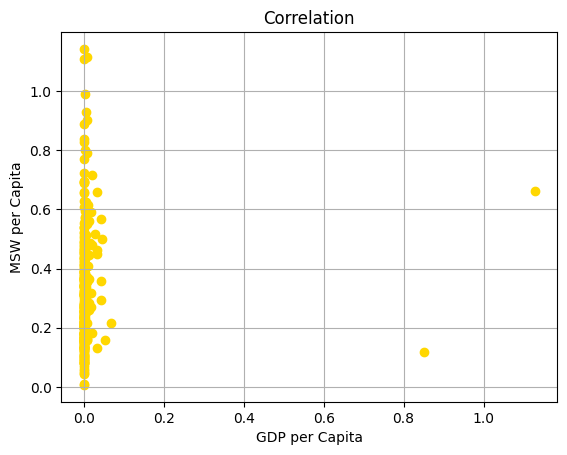

In [66]:
# Example Analysis: Correlation between GDP per capita and MSW per capita
correlation = merged_table["gdp per capita"].corr(merged_table["msw per capita"])
print(f"Correlation between GDP per capita and MSW per capita: {correlation}")

import matplotlib.pyplot as plt

plt.scatter(merged_table["gdp per capita"], merged_table["msw per capita"], color='gold')
plt.title("Correlation")
plt.xlabel("GDP per Capita")
plt.ylabel("MSW per Capita")
plt.grid()
plt.show()